# Bài tập: Biến đổi miền không gian sang miền tần số dùng FFT

Học sinh thực hiện: Nguyễn Hoàng Trung. MSSV: 17521176

Khởi tạo các phương trình sóng và in phương trình sóng thứ nhất

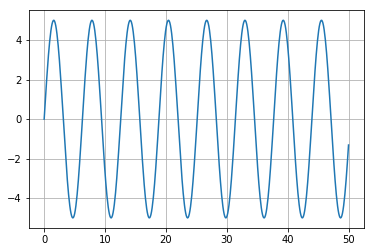

In [8]:
import numpy as np
import matplotlib.pyplot as plt
Fs = 1000
T = 1/Fs
L = 1500
#Number of sample point
N = 500
#Sample Spacing
T = 0.1

t = np.linspace(0.0,N*T,N)
#S1 = 6*np.sin(t)
#S2 = np.sin(2*120*np.pi*t)

S1 = 5*np.sin(t)
S2 = np.cos(2*np.pi*t)

plt.plot(t,S1)
plt.grid()
plt.show()


In phương trình sóng thứ hai

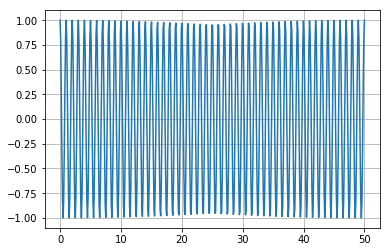

In [9]:
plt.plot(t,S2)
plt.grid()
plt.show()


Cộng hai phương trình sóng lại với nhau

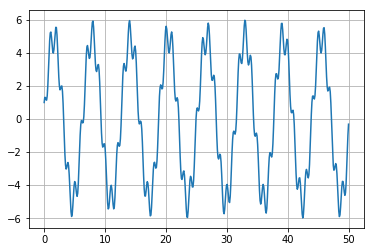

In [3]:
S = S1 + S2
plt.plot(t,S)
plt.grid()
plt.show()


Biến đổi FFT

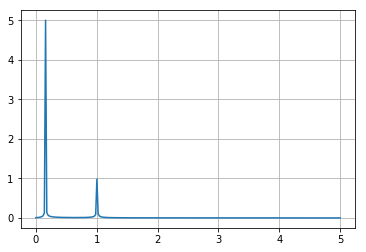

In [4]:
from scipy.fftpack import fft
yf = fft(S)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Biến đổi ngược phương trình FFT về phương trình tổng hai sóng ban đầu

D:\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


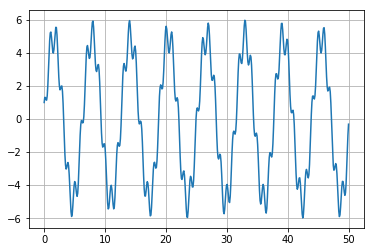

In [5]:
from scipy.fftpack import ifft
yinv = ifft(yf)
plt.plot(t,yinv)
plt.grid()
plt.show()

Thử loại bỏ S2 từ phương trình FFT và biến đổi về phương trình sóng ban đầu

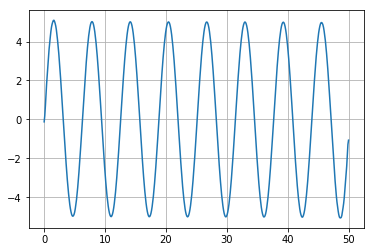

In [16]:
from scipy.fftpack import rfft, irfft, fftfreq
#https://stackoverflow.com/questions/39799821/how-to-remove-frequency-from-signal?fbclid=IwAR1_BgjsLi5OIuYe1TGX7Z1S--gp5LJ4c5AVSb0AKeqbcOosuLezJ9qoJkk
f_signal = rfft(S)
W = fftfreq(S.size, d = t[1] - t[0])
cut_f_signal = f_signal.copy()
cut_f_signal[(W>0.6)] = 0
cut_signal = irfft(cut_f_signal)
plt.plot(t,cut_signal)
plt.grid()
plt.show()